# Практика №2

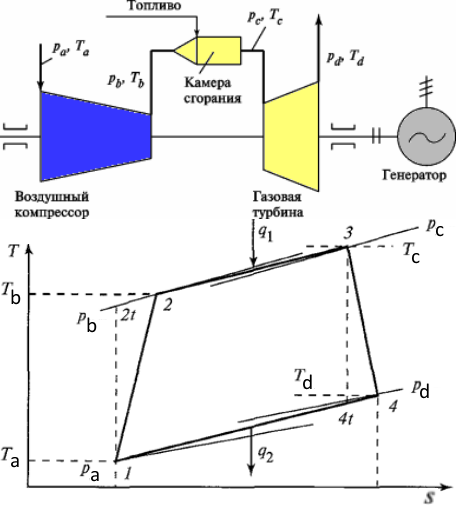

In [1]:
to_kelvin = lambda x: x + 273.15
MPa = 1e6

## Задача 1

Для идеальной ГТУ простого цикла ($η_т$=$η_к$=$η_{кс}$=1) определить термический КПД $η_t$ и коэффициент полезной работы φ при температурах газа перед турбиной $t_с$ = 800 °С, воздуха перед компрессором $t_а$ = 5 °С и степени повышения давления в нем ε = 6,5. Принять теплоемкости Cp.в.=Cp.г. и показатель изоэнтропы k=1,4.

$$m = \frac{k-1}{k}$$

$$\tau = \frac{T_c}{T_a}$$

Если принять $m_г$ == $m_в$ == m и $\delta$ == $\varepsilon$

$$\varphi = 1 - \frac{\varepsilon^m}{\tau \eta_t \eta_k}$$

$$ \eta_t = 1 - \varepsilon ^ {-m} $$

In [2]:
k = 1.4
m = (k - 1) / k

T_c = to_kelvin(800)
T_a = to_kelvin(5)
tau = T_c / T_a

eps = 6.5

In [3]:
thermal_efficiency = 1 - eps ** (-m)
print(f"Термическое КПД: {thermal_efficiency}")

Термическое КПД: 0.4142139286255897


In [4]:
phi = 1 - ((eps ** m) / tau)
print(f"Коэффициент полезной работы: {phi}")

Коэффициент полезной работы: 0.5575343166684201


## Задача 2

Определить параметры за компрессором и потребляемую им внутреннюю мощность:
* Давление на входе $P_а$ = 0,1 МПа;
* Температура на входе $t_а$ = 15 °С;
* Степень сжатия ε = 16;
* Коэффициент $m_в$ = 0,24;
* Теплоемкости воздуха $Cр_в$ = var кДж/(кг∙K);
* КПД компрессора $η_к$ = 0,88;
* Расход воздуха $G_к$ = 250 кг/с.

$$P_b = \varepsilon P_a$$

$$H_k = Cp_в T_a (\varepsilon^{m_в} - 1) / \eta_k$$

$$T_b = T_a (1 + \frac{\varepsilon^{m_в} - 1}{\eta_k}) $$

$$N_k = G_k H_k$$

In [5]:
P_a = 0.1 * MPa
T_a = to_kelvin(15)
eps = 16
m = 0.24
air_heat_capacity = 1007 # At 27 *C
compressor_efficiency = 0.88
air_mass_flow_rate = 250

In [6]:
P_b = eps * P_a
print(f"Давление за компрессоров, MПa: ", P_b / MPa)

Давление за компрессоров, MПa:  1.6


In [7]:
T_b = T_a * (1 + ((eps ** m) - 1) / compressor_efficiency)
print(f"Температура за компрессором, K: ", T_b)

Температура за компрессором, K:  597.6852797655683


In [8]:
k = 1 / (1 - m)
Cv = air_heat_capacity / k
R = air_heat_capacity - Cv

V_b = R * T_b / P_b

print(f"Удельны объем за компрессором: m^3 / kg", V_b)

Удельны объем за компрессором: m^3 / kg 0.09028036150858912


In [9]:
specific_work = air_heat_capacity * T_a * (eps ** m - 1) / compressor_efficiency
power = air_mass_flow_rate * specific_work

print(f"Внутренняя мощность компрессора, МВт", power / 1e6)

Внутренняя мощность компрессора, МВт 77.92550668098183


## Задача 3

Определить температуру газа за газовой турбиной, удельную работу расширения и мощность:
* Температура перед турбиной $t_с$ = 1000 °С;
* Давление перед турбиной $p_с$ = 1,6 МПа;
* Давление за турбиной $p_d$ = 0,1 МПа;
* Расход газов $G_г$ = 254,2 кг/с;
* КПД газовой турбины $η_т$ = 0,89;
* Теплоемкости газа $Cр_г$ = var кДж/(кг∙K);
* Коэффициент $m_г$ = 0,25.

$$\delta = \frac{P_c}{P_d}$$

$$T_d = T_c (1 - (1 - \delta ^ {m_г}) \eta_т)$$

$$H_т = Cp_г T_c (1 - \delta ^ {m_г}) \eta_т$$

$$N_т = G_т H_т$$

In [10]:
T_c = to_kelvin(1000)
P_c = 1.6 * MPa
P_d = 0.1 * MPa
gas_mass_flow_rate = 254.2 
gas_turbine_efficiency = 0.89
Cp = 1225  # Зададимся
m = 0.25

In [11]:
delta = P_c / P_d
delta

16.0

In [12]:
T_d = T_c * (1 - (1 - delta**(-m)) * gas_turbine_efficiency)
print(f"Температура за турбиной, K: ", T_d)

Температура за турбиной, K:  706.59825


In [13]:
H_t = Cp * T_c * (1 - delta ** (-m)) * gas_turbine_efficiency
print(f"Удельная работа расширения, кДж / кг: ", H_t / 1000)

Удельная работа расширения, кДж / кг:  694.02589375


In [14]:
N_t = gas_mass_flow_rate * H_t
print(f"Внутренняя мощность газовой турбины, МВт", N_t / 1e6)

Внутренняя мощность газовой турбины, МВт 176.42138219125


## Задача 4

Посчитать на данных из задач 2 и 3 $\eta_i$ и $\varphi$ если известно:
* $\eta_т = 0.9$
* $\eta_к = 0.85$
* $\eta_{кс} = 0.95$

$$\eta_i = \frac{H_т - Н_к}{q_{кс}}$$

$$\varphi =  \frac{H_т - Н_к}{H_т}$$

###### В идеале:

$$q_{кс} = (1/\eta_{кс}) Сp (T_c - T_b)$$

$$H_т = Cp_г T_c (1 - \delta ^ {-m_г}) \eta_т$$

$$H_k = Cp_в T_a (\varepsilon^{m_в} - 1) / \eta_k$$


###### Упрощенно:

$$\eta_i = \frac
{\tau(1 - \delta ^ {-m})\eta_т - (\varepsilon^m - 1)/\eta_к}
{\tau - 1 - (\varepsilon^m - 1) / \eta_к}
$$

Если принять $m_г$ == $m_в$ == m и $\delta$ == $\varepsilon$, $Cp_г$==$Cp_в$

$$\varphi = 1 - \frac{\varepsilon^m}{\tau \eta_t \eta_k}$$

In [15]:
Cp_air = 1007
Cp_gas = 1225
Cp = (Cp_air + Cp_gas) / 2

m_air = 0.24
m_gas = 0.25
m = (m_air + m_gas) / 2

turbine_efficiency = 0.9
compressor_efficiency = 0.85
combustor_efficiency = 0.95

eps = 16
delta = 16

T_a = to_kelvin(15)
T_c = to_kelvin(1000)
tau = T_c / T_a

#### Вариант 1

In [34]:
H_t = Cp * T_c * (1 - delta ** (-m)) * turbine_efficiency

In [35]:
H_k = Cp * T_a * ((eps ** m) - 1) / compressor_efficiency

In [36]:
T_b = T_a + (H_k / Cp_air)
q_comb = Cp * (T_c - T_b) * (1 / combustor_efficiency)

In [37]:
efficiency = (H_t - H_k) / q_comb
efficiency

0.3606733338587556

In [38]:
work_coefficient = (H_t - H_k) / H_t
work_coefficient

0.4164379918168869

#### Вариант 2

In [21]:
num_1 = tau * turbine_efficiency * (1 - eps ** (-m))
num_2 = ((eps ** m) - 1) / compressor_efficiency
denum = tau - 1 - (eps ** m - 1) / compressor_efficiency

efficiency = (num_1 - num_2) / denum
efficiency

0.3589833807398256

In [39]:
num = eps ** m
denum = tau * turbine_efficiency * compressor_efficiency
work_coefficient = 1 - num/denum
work_coefficient

0.4164379918168869